In [132]:
from sklearn.datasets import load_iris
import pandas as pd

In [134]:
dataset= load_iris()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [136]:
x=pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
y=pd.DataFrame(data=dataset.target,columns=["Target"])
x=x.iloc[:,:2]
x

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [138]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y["Target"]=encoder.fit_transform(y["Target"])
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [140]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [142]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knnuniform=KNeighborsClassifier(n_neighbors=11,weights="uniform")
knnuniform.fit(x_train,y_train)
y_pred=knnuniform.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.62      0.67      0.64        12
           2       0.50      0.44      0.47         9

    accuracy                           0.76        38
   macro avg       0.71      0.70      0.70        38
weighted avg       0.76      0.76      0.76        38



C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [146]:
knndistance=KNeighborsClassifier(n_neighbors=11,weights="distance")
knndistance.fit(x_train,y_train)
y_pred=knndistance.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.77      0.71      0.74        14
           2       0.50      0.57      0.53         7

    accuracy                           0.82        38
   macro avg       0.76      0.76      0.76        38
weighted avg       0.82      0.82      0.82        38



C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [148]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # Convert DataFrame to NumPy array if needed
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
    # Define the min and max for the plot boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create a mesh grid over the plot boundaries
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Predict class for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)  # Reshape to match grid shape
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    
    # Plot the original data points
    plt.scatter(X[:, 0], X[:, 1],  edgecolor='k')
    
    # Display the plot
    plt.show()


C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


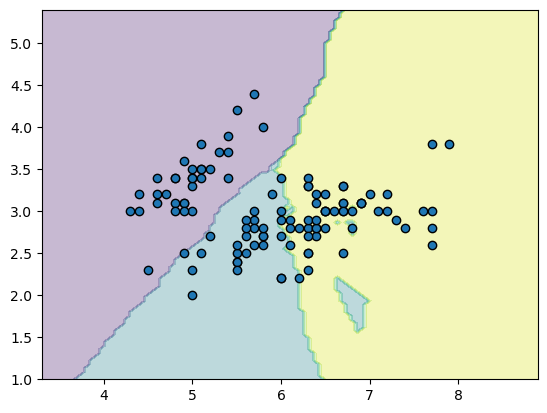

IndexError: index 1 is out of bounds for axis 1 with size 1

In [150]:
import numpy as np
import matplotlib.pyplot as plt
plot_decision_boundary(knnuniform, x_train, y_train)

# Plot for distance weights
plot_decision_boundary(knndistance, y_train, y_train)

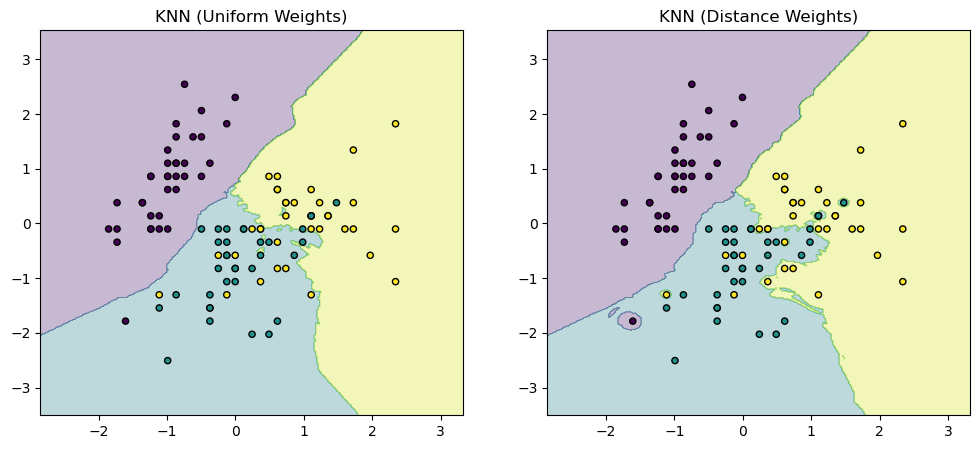

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Using only the first two features for simplicity
y = iris.target

# Split the dataset into train and test sets without specifying random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define two classifiers with different weight parameters
knn_uniform = KNeighborsClassifier(n_neighbors=11, weights='uniform')
knn_distance = KNeighborsClassifier(n_neighbors=11, weights='distance')

# Fit the classifiers
knn_uniform.fit(X_train, y_train)
knn_distance.fit(X_train, y_train)

# Set up the mesh grid for plotting decision boundaries
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

plt.figure(figsize=(12, 5))

# Plot for 'uniform' weights
Z_uniform = knn_uniform.predict(np.c_[xx.ravel(), yy.ravel()])
Z_uniform = Z_uniform.reshape(xx.shape)
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_uniform, alpha=0.3)  # Light color for decision boundaries
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20)
plt.title("KNN (Uniform Weights)")

# Plot for 'distance' weights
Z_distance = knn_distance.predict(np.c_[xx.ravel(), yy.ravel()])
Z_distance = Z_distance.reshape(xx.shape)
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_distance, alpha=0.3)  # Light color for decision boundaries
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20)
plt.title("KNN (Distance Weights)")

# Display the plot
plt.show()
